# What is Clustering

Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.
A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.
A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.
We can show this with a simple graphical example:


<img src="https://summerofhpc.prace-ri.eu/wp-content/uploads/2013/07/k-means_ilustration.png">


In this case we easily identify the 4 clusters into which the data can be divided; the similarity criterion is distance: two or more objects belong to the same cluster if they are “close” according to a given distance (in this case geometrical distance). This is called distance-based clustering.
Another kind of clustering is conceptual clustering: two or more objects belong to the same cluster if this one defines a concept common to all that objects. In other words, objects are grouped according to their fit to descriptive concepts, not according to simple similarity measures.

# The Goals of Clustering
So, the goal of clustering is to determine the intrinsic grouping in a set of unlabeled data. But how to decide what constitutes a good clustering? It can be shown that there is no absolute “best” criterion which would be independent of the final aim of the clustering. Consequently, it is the user which must supply this criterion, in such a way that the result of the clustering will suit their needs.
For instance, we could be interested in finding representatives for homogeneous groups (data reduction), in finding “natural clusters” and describe their unknown properties (“natural” data types), in finding useful and suitable groupings (“useful” data classes) or in finding unusual data objects (outlier detection).

# Possible Applications
Clustering algorithms can be applied in many fields, for instance:

   * Marketing: finding groups of customers with similar behavior given a large database of customer data containing their properties and past buying records;
   * Biology: classification of plants and animals given their features;
Libraries: book ordering;
   * Insurance: identifying groups of motor insurance policy holders with a high average claim cost; identifying frauds;
   * City-planning: identifying groups of houses according to their house type, value and geographical location;
   * Earthquake studies: clustering observed earthquake epicenters to identify dangerous zones;
   * WWW: document classification; clustering weblog data to discover groups of similar access patterns.


# Requirements
The main requirements that a clustering algorithm should satisfy are:

   * scalability;
   * dealing with different types of attributes;
   * discovering clusters with arbitrary shape;
   * minimal requirements for domain knowledge to determine input parameters;
   * ability to deal with noise and outliers;
   * insensitivity to order of input records;
   * high dimensionality;
   * interpretability and usability.


# Problems
There are a number of problems with clustering. Among them:

   * current clustering techniques do not address all the requirements adequately (and concurrently);
   * dealing with large number of dimensions and large number of data items can be problematic because of time complexity;
   * the effectiveness of the method depends on the definition of “distance” (for distance-based clustering);
   * if an obvious distance measure doesn’t exist we must “define” it, which is not always easy, especially in multi- dimensional spaces;
   * the result of the clustering algorithm (that in many cases can be arbitrary itself) can be interpreted in different ways.

# K-means clustering

In [7]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'linalg', 'fft', 'power', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Mixture Densities


Consider a collection of points that are sampled from three different densities,
in this case normal densities with the same covariances but different means.



In [8]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

Here is a scatterplot of this data.

We clearly see three _clusters_, corresponding to the three _mixture components_.
How can we recover these clusters?

This is the job of _clustering algorithms_.
One of the most useful clustering algorithms is the _k-means_ algorithm



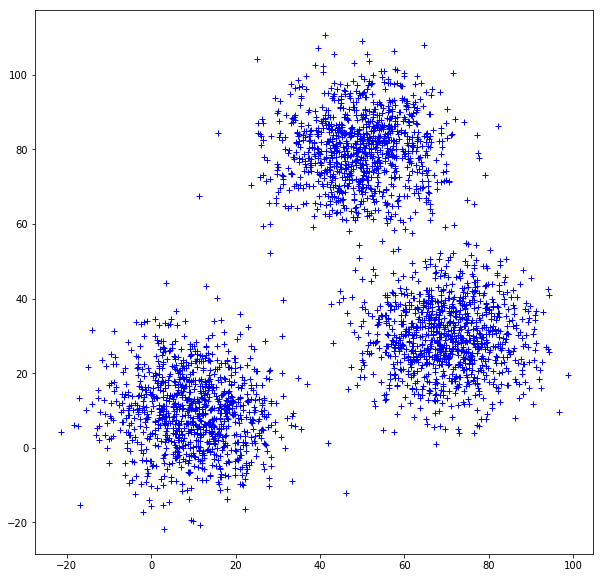

In [9]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

Mixture densities arise in both unsupervised learning and in supervised learning.
In both cases, they commonly represent a problem structure in which data is
generated from a number of ideal prototypes (the cluster centers) but then
corrupted by noise.

- When each cluster has a distinct class label, we have a regular classification
problem with normal densities.

- When no cluster has any labels, we can hope to recover the underlying
clusters with a clustering algorithm and then assign labels to these clusters.
This is a form of _semi-supervised learning_.

- When there is training data with labels available, often each class is
a mixture of multiple clusters.  That is, each class is generated by multiple
prototypes (think characters in different fonts).

You can perform clustering either at the class level or across all samples and then label each cluster with its
corresponding class label.

k-Means Algorithm
=================

The _k-means algorithm_ is an example of an expectation maximization algorithm.
Such algorithms generally have a form in which we need to find some parameters,
but in order to find those parameters, we need to know some other values that
we can't observe directly.

In this case, we want to find the cluster centers (`protos` array), but
in order to compute the cluster center for each cluste, we would have to
know what cluster each data point belongs do, which we don't.

The EM approach is to just guess the result.

In [10]:
protos = array([[30,30],[40,20],[0,90],[50,50]])
start = protos.copy()

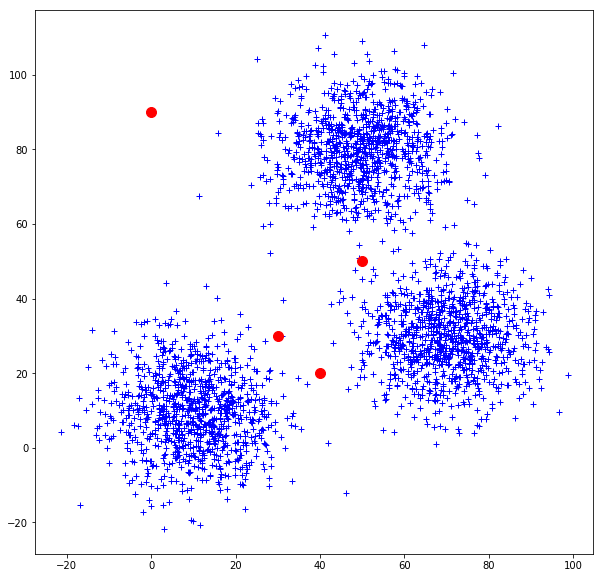

In [11]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

Obviously, those centers are wildly wrong, but let's keep going.

Now, we compute the assignment of the data points to the prototypes
(array `closest`).
This is also wildly wrong, but we're going to be using it anyay.

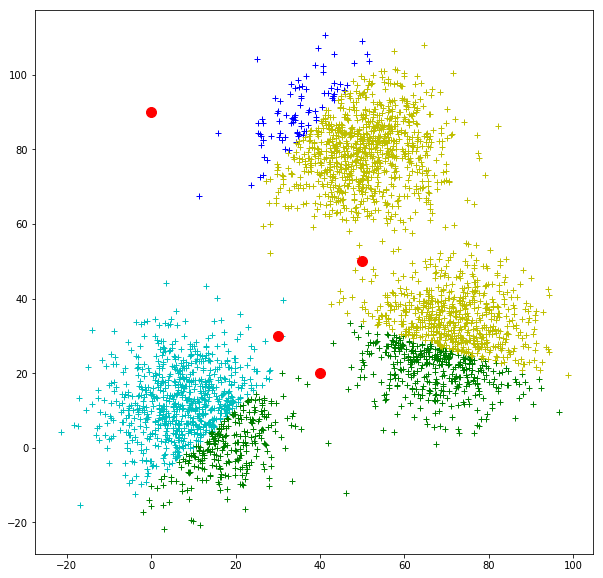

In [12]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [13]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

Now we pretend that the cluster assignments are correct and
recompute the location of the centers.

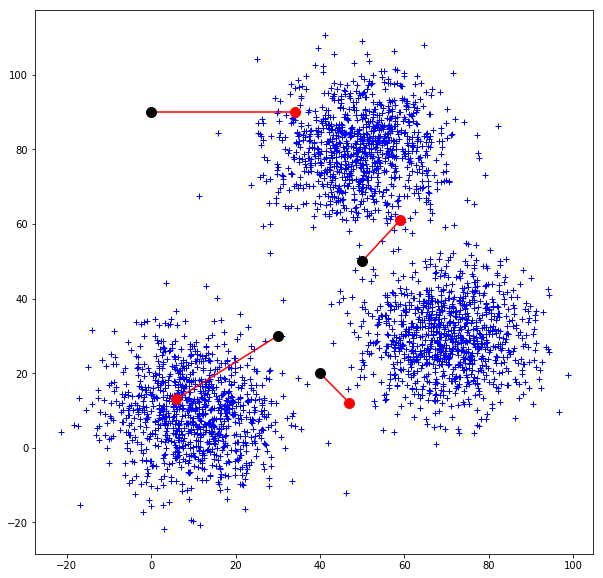

In [14]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the centers have moved, and it looks like they have generally
moved in the right direction.

Now let's just repeat this process multiple times.

In [15]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

We can now plot the path that the prototype guesses have taken.

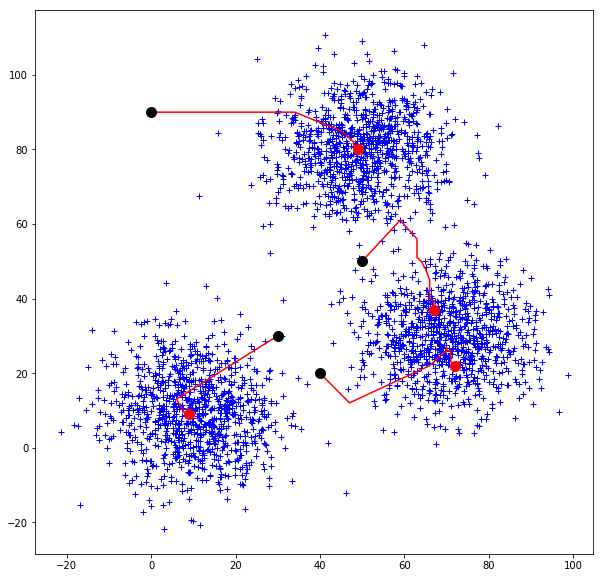

In [16]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the final location of the prototype centers (red) are nicely
in the center of the classes.
The algorithm doesn't give us exactly the cluster centers because there are
three clusters but we postulated four cluster centers.

We can also look at the partition of the data induced by these cluster centers.

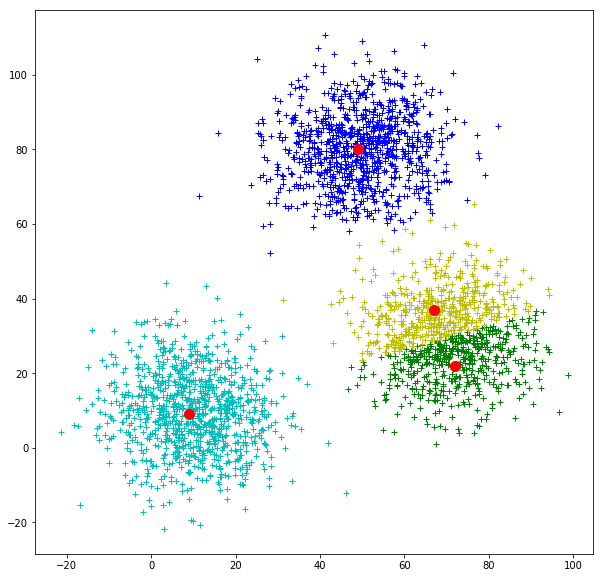

In [17]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

# Hierarchical Clustering

In [18]:

import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [19]:

ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

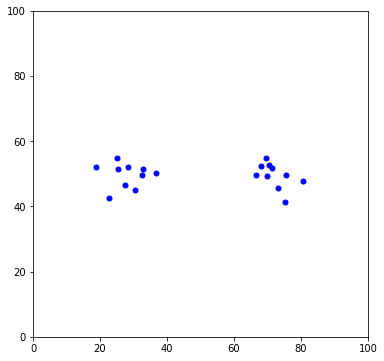

In [20]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

The idea behind linkage clustering, or hierarchical clustering, is to put things that are close together into the same cluster. Linkage clustering is usually based on distances only.



In [21]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

Based on pairwise distances, we can now compute a linkage matrix. We successively merge the closest points/clusters into the same cluster. The linkage "matrix" is simply a table listing which pairs of points are merged at what step and what distance.



In [22]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

array([[ 11.        ,  18.        ,   4.06509644,   2.        ],
       [  8.        ,   9.        ,   4.4395002 ,   2.        ],
       [  3.        ,  21.        ,   6.49019933,   3.        ],
       [ 14.        ,  19.        ,   7.63211211,   2.        ],
       [  7.        ,  22.        ,   7.93280526,   4.        ]])

Linkage information can be visualized as a dendrogram. Since we didn't shuffle the data, it's easy to see that the dendrogram reflects the structure of the original data.



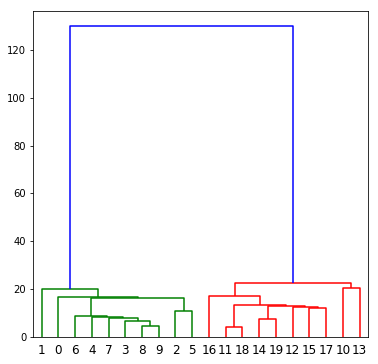

In [23]:
_=dendrogram(lm)

We can "cut" the dendrogram to form flat clusters. If we cut into two clusters, we get a good answer.



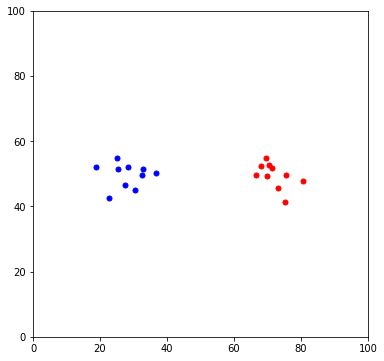

In [24]:
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

# Linkage Methods

In [25]:

data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- single linkage: cluster distance = smallest pairwise distance
- complete linkage: cluster distance = largest pairwise distance
- average linkage: cluster distance = average pairwise distance

## Single Linkage

Single Linkage:

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with unusual structure

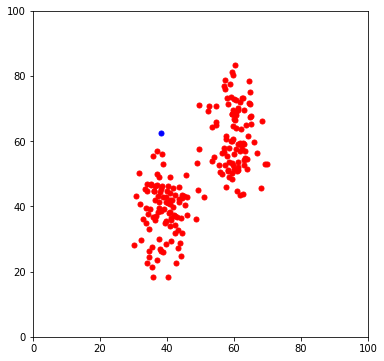

In [26]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

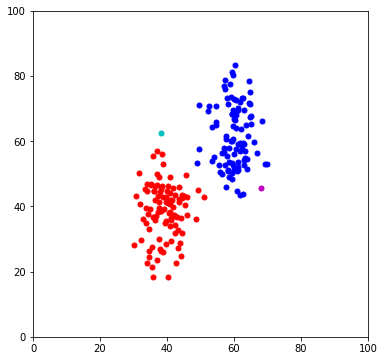

In [27]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

## Complete Linkage

Complete Linkage:

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage

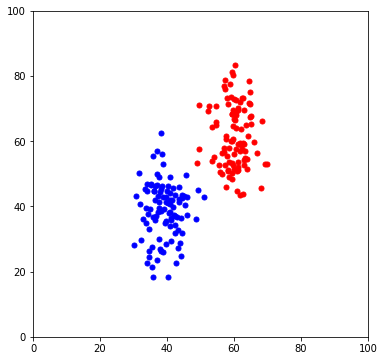

In [28]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

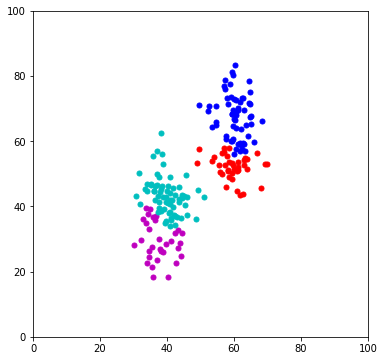

In [29]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

## Average Linkage

Average Linkage:

- cluster distance is the average distance of all pairs of points in clusters 1 and 2

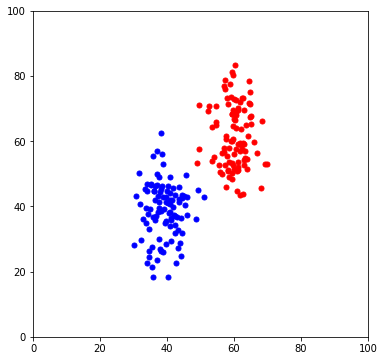

In [30]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

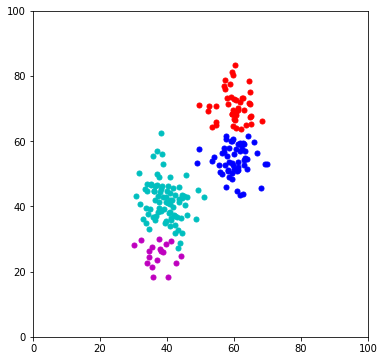

In [31]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

## Centroid Linkage

Average Linkage:

- cluster distance is the distance of the centroids of both clusters

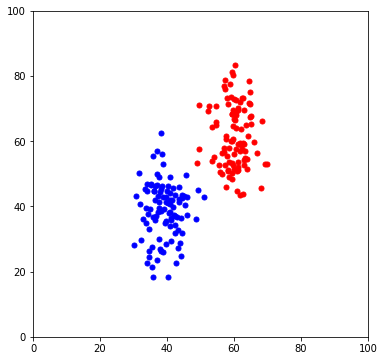

In [32]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

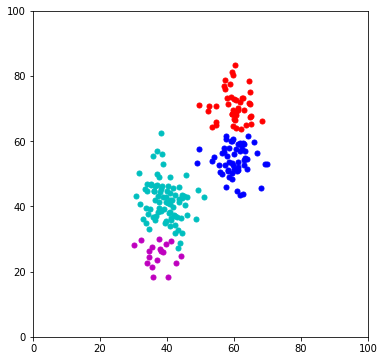

In [33]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

## Ward Linkage

Ward linkage:

- based on minimizing a variance criterion before and after merging

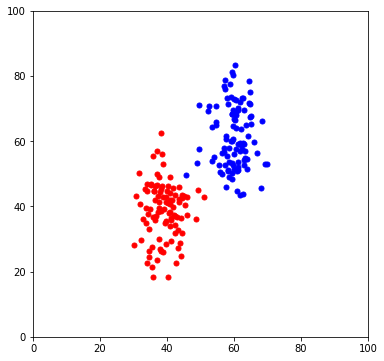

In [34]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

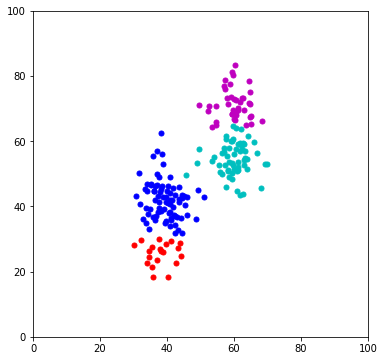

In [35]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

### Difference between k-means and hierarchical clustering

The most important difference is the hierarchy. Actually, there are two different approaches that fall under this name: top-down and bottom-up.

In top-down hierarchical clustering, we divide the data into 2 clusters (using k-means with k=2, for example). Then, for each cluster, we can repeat this process, until all the clusters are too small or too similar for further clustering to make sense, or until we reach a preset number of clusters.

In bottom-up hierarchical clustering, we start with each data item having its own cluster. We then look for the two items that are most similar, and combine them in a larger cluster. We keep repeating until all the clusters we have left are too dissimilar to be gathered together, or until we reach a preset number of clusters.

In k-means clustering, we try to identify the best way to divide the data into kk sets simultaneously. A good approach is to take k items from the data set as initial cluster representatives, assign all items to the cluster whose representative is closest, and then calculate the cluster mean as the new representative, until it converges (all clusters stay the same).

### Pros and Cons

#### Time Complexity
K-means is linear in the number of data objects i.e. O(n), where n is the number of data objects. The time complexity of most of the hierarchical clustering algorithms is quadratic i.e. O(n2). Therefore, for the same amount of data, hierarchical clustering will take quadratic amount of time. Imagine clustering 1 million records?

#### Shape of Clusters
K-means works well when the shape of clusters are hyper-spherical  (or circular in 2 dimensions). If the natural clusters occurring in the dataset are non-spherical then probably K-means is not a good choice.

#### Repeatability
K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. However, with hierarchical clustering, you will most definitely get the same clustering results.

Off course, K-means clustering requires prior knowledge of K (or number of clusters), whereas in hierarchical clustering you can stop at whatever level (or clusters) you wish.